# Analyzing the Stroop Effect
## Saeid Rostami


## What is stroop test:
Stroop Task is a psychological experiments and it demonstrates the difficulty of saying the colour of words if the colour and word is not match [1]. The task has two conditions: a congruent condition, and an incongruent condition. In the congruent condition, the words and colours are match. In the incongruent condition, on the other hand, the words and colours are not match. The participants tasks are to say the colour of the words loudly [2].

![title](stroop.jpg)

## Method:

In this study, the time in seconds that takes to name words' colours in equal sized lists for each participant is measured. The independent variable is the type of condition applied to the student and the dependent variable is the time in seconds.

To analyze our hypothesis we will use a dependent samples t-test, also known as a paired t-test. Each participant will do the test for both conditions, the congruent condition and incongruent condition. We need to determine whether the mean difference between the two conditions is significantly or not.

## Hypothesis:
- $H_0: \mu_2 - \mu_1 = 0 $
- $H_a: \mu_2 - \mu_1 \neq 0 $


- $\mu_1$ is the mean of the congruent condition 
- $\mu_2$ is the mean of the incongruent condition

Also $\alpha = 0.05$

Since our sample size is less than 30 and the population standard deviations is unknown the most appropriate statistical test can be t-test. A paired sample t-test will be used since the same subject is being tested under two separate conditions.

### Assumption:
- Test results are independent from each other
- Population data has a normal distribution

### Importing Libraries

In [1]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Loading Data

In [2]:
#Loading data to Pandas dataframe
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [4]:
#Making new columns as Difference for the difference of Congruent column and Incongruent column

df["Difference"] = df["Congruent"] - df["Incongruent"]
df.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
Difference     24 non-null float64
dtypes: float64(3)
memory usage: 656.0 bytes


In [6]:
df.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


### t-test

In [7]:
#Applying t_test and save the results in t_stats and p_value
t_stats,p_value = stats.ttest_rel(df["Congruent"],df["Incongruent"])
print("t_stats: {:.4f}\np_value: {:.8f}".format(t_stats,p_value))

t_stats: -8.0207
p_value: 0.00000004


### Data Visualization

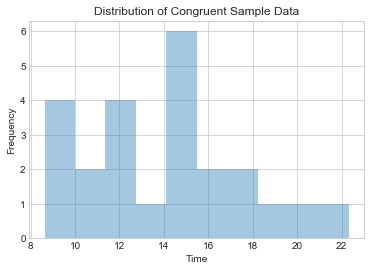

In [8]:
#Distribution of Congruent Data
sns.set_style('whitegrid')
g = sns.distplot(df["Congruent"],bins = 10,kde = False)
g.axes.set_title("Distribution of Congruent Sample Data")
plt.xlabel("Time")
plt.ylabel("Frequency");

As we can see from above most participants completed their tast in about 15 seconds.

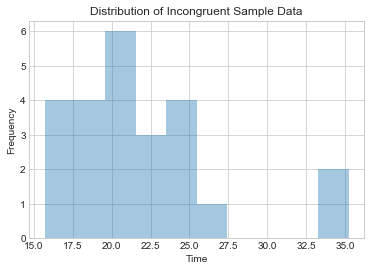

In [9]:
#Distribution of Incongruent Data
g = sns.distplot(df["Incongruent"], kde = False, bins = 10)
g.axes.set_title("Distribution of Incongruent Sample Data")
plt.xlabel("Time")
plt.ylabel("Frequency");

As it's seen from above we have some outliers in Incongruent data and most participants finished their job in about 20 seconds.

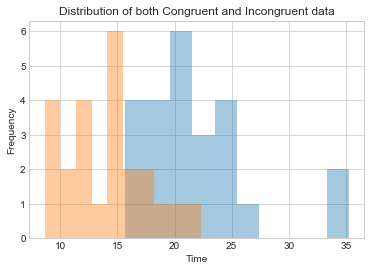

In [10]:
#Comparing Incongruent and Congruent
sns.distplot(df["Incongruent"], kde = False, bins = 10)
sns.distplot(df["Congruent"],bins = 10,kde = False)
plt.title("Distribution of both Congruent and Incongruent data")
plt.xlabel("Time")
plt.ylabel("Frequency");

Participants in Incongruent type spent more time to finish their tasks than people in Congruent test. 

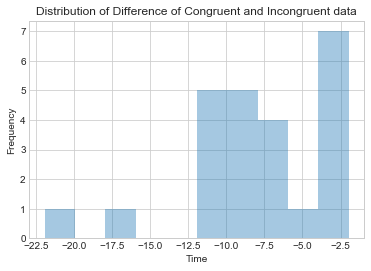

In [11]:
#Distribution of difference of Incongruent and Congruent
sns.distplot(df["Difference"], kde = False, bins = 10)
plt.title("Distribution of Difference of Congruent and Incongruent data")
plt.xlabel("Time")
plt.ylabel("Frequency");

In [15]:
t_critical = stats.t.ppf(q=0.05, df=23)
print("t_critical: {}".format(t_critical))

t_critical: -1.7138715277470478


### Analysis

- p_value: 0.00000004
- t-value: 8.0207
-  one-tailed critical statistic value: 1.713
- degrees of freedom: 23
- Confidence Interval: 95% 
- $\alpha: 0.05$

From df.describe() function we can see that the mean of the incongruent condition is greater than the mean of the congruent condition,7.964, it means that people in incongruent test spent more time than participants in congruent  test. Additionally we can see that the standard deviation of the incongruent condition is greater than the standard deviation of the congruent condition. From the plot of distribution of incongruent data it is seed that  the incongruent condition has some outliers, which spent more time to finish their tasks. The result of both conditions is also shown a uniform right shift from the congruent condition to the incongruent condition.

Output of  t test shows that there is a significant difference between the congruent and incongruent conditions with the t-statistic of 8.02 and a p-value of less than .01. Since the alpha value is  0.05 it is obvious that our p-value is less than alpha. As a result of that, we reject the null hypothesis that there is no difference between the incongruent and congruent conditions. Instead we accept the alternative hypothesis as it has been shown with above 95% confidence that there is a significant statistical difference between the congruent and incongruent conditions. 

We can conclude that there is a perceptual link between text based image with it's colour, and that relationship causes a delayed reaction in the incongruent condition.  It can be due to the fact that  colour and active reading are processed in different areas our brains. Interference occurs when we look at one of the words then we can see both its colour and its meaning. These two different bits of information begin to confuse the brain, forcing our brain to make a choice and pick one [3]. 

## References

- [1] https://www.psytoolkit.org/experiment-library/stroop.html
- [2] https://en.wikipedia.org/wiki/Stroop_effect
- [3] https://d2l.deakin.edu.au/d2l/eP/presentations/presentation_preview_popup.d2l?presId=67655